In [1]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


2023-12-23 23:26:38.587263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('hair_loss.csv')
X = data.drop('hair_fall', axis=1)
y = data.hair_fall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
y_train

76513    2
60406    1
27322    4
53699    1
65412    4
        ..
6265     2
54886    4
76820    3
860      3
15795    0
Name: hair_fall, Length: 70000, dtype: int64

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_encoded = to_categorical(y_train, num_classes=6)
y_test_encoded = to_categorical(y_test, num_classes=6)

In [5]:
y_train_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-12-23 23:26:44.169402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [16]:
model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/100
2188/2188 [==============================] - 5s 2ms/step - loss: 1.7919 - accuracy: 0.1657 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/100
2188/2188 [==============================] - 4s 2ms/step - loss: 1.7918 - accuracy: 0.1676 - val_loss: 1.7919 - val_accuracy: 0.1642
Epoch 3/100
2188/2188 [==============================] - 4s 2ms/step - loss: 1.7918 - accuracy: 0.1683 - val_loss: 1.7919 - val_accuracy: 0.1670
Epoch 4/100
2188/2188 [==============================] - 4s 2ms/step - loss: 1.7919 - accuracy: 0.1680 - val_loss: 1.7919 - val_accuracy: 0.1670
Epoch 5/100
2188/2188 [==============================] - 4s 2ms/step - loss: 1.7918 - accuracy: 0.1680 - val_loss: 1.7919 - val_accuracy: 0.1642
Epoch 6/100
2188/2188 [==============================] - 4s 2ms/step - loss: 1.7918 - accuracy: 0.1686 - val_loss: 1.7918 - val_accuracy: 0.1670
Epoch 7/100
2188/2188 [==============================] - 4s 2ms/step - loss: 1.7918 - accuracy: 0.1688 - val_loss: 1.7919 - val_ac

In [9]:
accuracy = model.evaluate(X_test_scaled, y_test_encoded)[1]
print(f'Accuracy: {accuracy * 100:.2f}%')

938/938 [==============================] - 1s 1ms/step - loss: 1.7921 - accuracy: 0.1668
Accuracy: 16.68%


In [10]:
predictions = model.predict(X_test_scaled)
predicted_classes = predictions.argmax(axis=1)

938/938 [==============================] - 1s 1ms/step


In [11]:
predicted_classes

array([5, 5, 5, ..., 5, 5, 5])

In [12]:
y_test

75721    0
80184    1
19864    3
76699    1
92991    3
        ..
42648    4
86306    3
45466    1
63724    3
34122    3
Name: hair_fall, Length: 30000, dtype: int64

In [13]:
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[   0,    0,    5,    0,   17, 5014],
       [   0,    0,    3,    0,   20, 5001],
       [   0,    1,    3,    0,   12, 4910],
       [   0,    0,    4,    0,   12, 4977],
       [   0,    0,    1,    0,   14, 4997],
       [   0,    0,    7,    0,   15, 4987]])

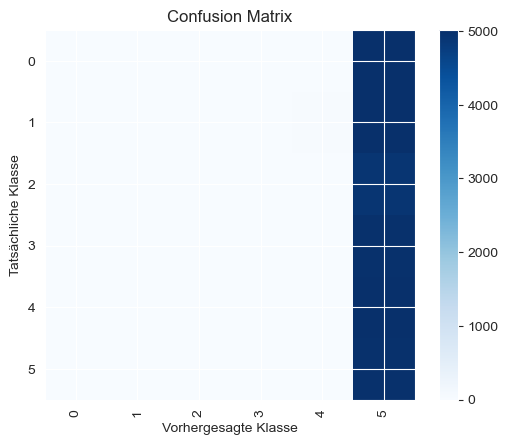

In [14]:
classes = np.unique(y_train)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xticks(rotation='vertical')

plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [15]:
classification_report_result = classification_report(y_test, predicted_classes)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5036
           1       0.00      0.00      0.00      5024
           2       0.13      0.00      0.00      4926
           3       0.00      0.00      0.00      4993
           4       0.16      0.00      0.01      5012
           5       0.17      1.00      0.29      5009

    accuracy                           0.17     30000
   macro avg       0.08      0.17      0.05     30000
weighted avg       0.08      0.17      0.05     30000



/Users/slw/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/slw/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/slw/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le